In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import locale 
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df=pd.read_csv('C:/Users/gksgh/OneDrive/바탕 화면/캡스톤4.csv',encoding='CP949')

In [3]:
df.head()

Date User             Message  Unnamed: 3 Unnamed: 4
0  2022-08-28 13:29  강호수                이모티콘         NaN        NaN
1  2022-08-28 13:29  최종은                 여섯시         NaN        NaN
2  2022-08-28 13:29  최종은          철산역에서만날까??         NaN        NaN
3  2022-08-28 13:34  강호수                  웅웅         NaN        NaN
4  2022-08-28 14:16  최종은  여섯시오키ㅎㅎ철산밥잘하는곳알아??         NaN        NaN

In [4]:
df["Date"]=df["Date"].astype("datetime64") 

df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df["hour"]=df["Date"].dt.hour
df['weekday']=df["Date"].dt.strftime("%A")

df.isnull().sum()

df["User"]=df["User"].fillna("(알 수 없음)")

<AxesSubplot:title={'left':'월별 메시지 개수'}>

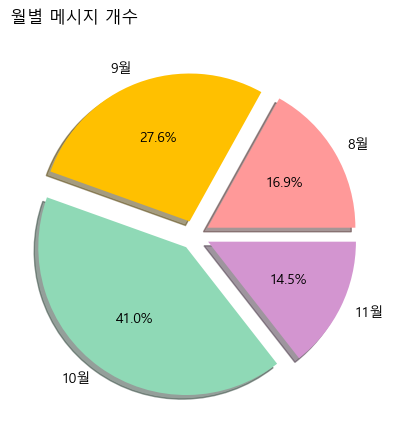

In [7]:
labels1=["8월", "9월", "10월", "11월"]
explode=(0.1,0.1,0.1,0.1)
colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

df.groupby("month")["Message"].count()

plt.title("월별 메시지 개수", loc='left', pad=20)
df[df["year"]==2022].groupby("month")["Message"].count().plot(kind="pie"
,labels=labels1,autopct='%.1f%%',explode=explode,shadow=True,colors=colors,ylabel="")

<AxesSubplot:title={'left':'시간별 메시지 개수'}>

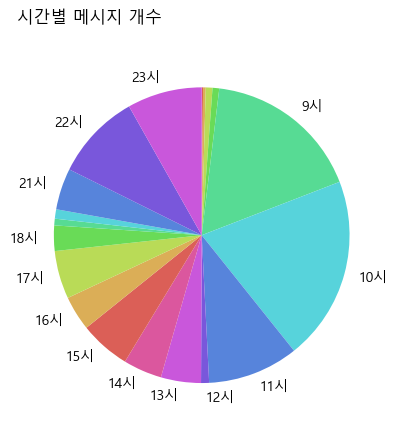

In [10]:
label3=["","","","","9시","10시","11시","12시","13시","14시","15시","16시","17시","18시","","","21시","22시","23시"]
explode3=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
colors3 = sns.color_palette('hls',10)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

df.groupby("hour")["Message"].count()

plt.title("시간별 메시지 개수", loc='left', pad=20)
df[df["year"]==2022].groupby("hour")["Message"].count().plot(kind="pie",colors=colors3,ylabel=""
,counterclock=False,labels=label3,startangle=90)

<AxesSubplot:title={'center':'보낸사람별 메시지 개수'}, xlabel='인원', ylabel='User'>

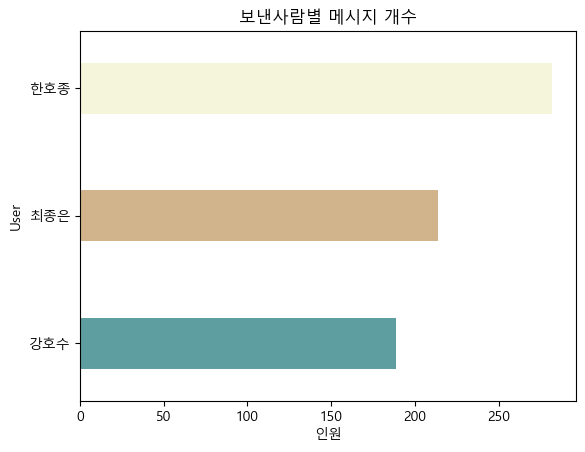

In [11]:
df.groupby("User")["Message"].count().sort_values(ascending=False)

df.groupby("User")["Message"].count().sort_values(ascending=True)[-11:].plot(kind="barh",
         title="보낸사람별 메시지 개수",width=0.4,color=["cadetblue","tan","beige"],xlabel="인원")

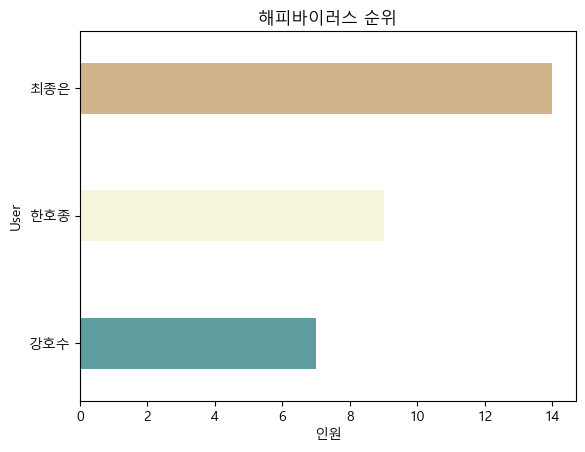

In [13]:
df[df["Message"].str.contains("ㅋ")].groupby("User")["Message"].count().sort_values(ascending=False)[:10]

df[df["Message"].str.contains("ㅋ")].groupby("User")["Message"].count().sort_values(ascending=True)[-11:].plot(kind="barh",
         title="해피바이러스 순위",width=0.4,color=["cadetblue","beige","tan"],xlabel="인원");

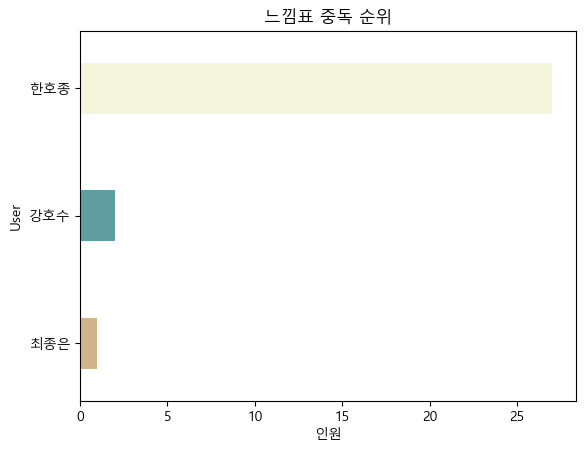

In [14]:
df[df["Message"].str.contains("!")].groupby("User")["Message"].count().sort_values(ascending=False)[:10]

df[df["Message"].str.contains("!")].groupby("User")["Message"].count().sort_values(ascending=True)[-11:].plot(kind="barh",
         title="느낌표 중독 순위",width=0.4,color=["tan","cadetblue","beige"],xlabel="인원");

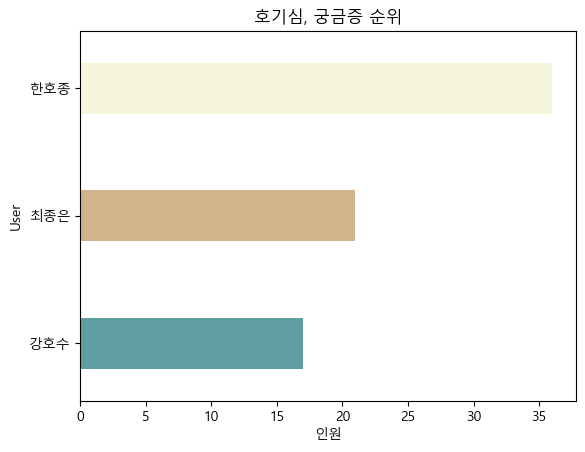

In [15]:
df[df["Message"].str.contains("\?")].groupby("User")["Message"].count().sort_values(ascending=False)[:10]

df[df["Message"].str.contains("\?")].groupby("User")["Message"].count().sort_values(ascending=True)[-11:].plot(kind="barh",
         title="호기심, 궁금증 순위",width=0.4,color=["cadetblue","tan","beige"],xlabel="인원");